In [1]:
import pandas as pd
import os
import sys
from pathlib import Path
import glob
import matplotlib.pyplot as plt
import emoji
import re

In [2]:
#df1=pd.read_csv(r'C:\Users\PROKO-WS\Desktop\Gautam\TwitterData\untitled.txt')
#df1.drop_duplicates(subset ="a", inplace=True) 
#df1.head()

In [3]:
df=pd.read_csv('final_snopes_poynter_factartcile_tweet_without_duplicates_tweet_withbrand_gender_18072020.csv')
df['created_at']=pd.to_datetime(df['created_at'])
df.drop_duplicates(subset ="id", inplace=True)
df.head()

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,id_merge,class_gender,Male,Female,Brand,twitterhandle,bot_details,b_score_eng,b_score_uni,bot_score
0,2020-06-08 19:53:19+00:00,1270081492908216320,1270081492908216320,1/2\n\n@WHO recently published a summary of tr...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,...,0,Brand,2.10,38.55,59.35,https://twitter.com/mvankerkhove,"{'cap': {'english': 0.002856940094612955, 'uni...",7.945465,8.899516,7.945465
1,2020-06-25 21:30:52+00:00,1276266636694163458,1276266636694163456,"Felicito a @CamaraElectoral por su necesaria, ...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,1,Male,72.45,9.10,18.45,https://twitter.com/Zovatto55,"{'cap': {'english': 0.0026183131920431966, 'un...",7.343326,19.466774,19.466774
2,2020-06-29 02:15:48+00:00,1277425505340477441,1277425505340477440,#IMPORTANTE\n\nComunicado documentado sobre el...,True,"{'hashtags': [{'text': 'IMPORTANTE', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,...,5,Brand,3.25,0.10,96.65,https://twitter.com/MinSaludBolivia,"{'cap': {'english': 0.0014828129117616376, 'un...",3.546593,3.798014,3.798014
3,2020-06-23 05:21:48+00:00,1275297986982141953,1275297986982141952,المكسيك 👇👇👇\nرمي جثث موتى الإصابات بفايروس كور...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,6,Brand,9.85,0.30,89.85,https://twitter.com/IraqiForati,"{'cap': {'english': 0.004268306222830912, 'uni...",10.827701,22.179569,22.179569
4,2020-06-23 19:25:07+00:00,1275510212384788480,1275510212384788480,Cases up only because of our big number testin...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,7,Male,75.95,10.65,13.40,https://twitter.com/realDonaldTrump,"{'cap': {'english': 0.0014187924969112314, 'un...",3.265991,2.991382,3.265991


In [4]:
tweets=1500
mention_tweets = df[~df['text'].str.contains("RT")  & df['text'].str.contains("@")]
x=round(len(mention_tweets)/tweets*100)
print("The percentage of retweets of all tweets is " + str(x) + "%")

The percentage of retweets of all tweets is 18%


In [5]:
df['user_status']=''
df['Person']=''
for i, row1 in df.iterrows():
    a=row1['Female']
    b=row1['Male']
    c=row1['Brand']
    if a>b or a>c:
        #print('female '+ str(row1['Female']))
        #print('male '+ str(row1['Male']))
        #print('brand '+ str(row1['Brand']))
        df.at[i,'Person']='Female'
        df.at[i,'user_status']='Female'
        df.at[i,'organization']='N'
    else: 
        pass
    if b>a or b>c:
        df.at[i,'Person']='Male'
        df.at[i,'user_status']='Male'
        df.at[i,'organization']='N'
    else: 
        pass
    if c>a or c>a:
        #df1.at[i,'Person']=row1['Female']
        df.at[i,'user_status']='Brand'
        df.at[i,'organization']='Y'
    else: 
        pass

In [6]:
df['class'].value_counts()

false              1274
partially false     226
Name: class, dtype: int64

In [7]:
df1=df.loc[(df['class'] == 'false')]
df2=df.loc[(df['class'] == 'partially false')]
df1.shape

(1274, 91)

In [8]:
df2['class'].value_counts()

partially false    226
Name: class, dtype: int64

In [9]:
df['normalise_retweet']=(df['retweet_count']-df['retweet_count'].min())/(df['retweet_count'].max()-df['retweet_count'].min())
df1['normalise_retweet']=(df1['retweet_count']-df1['retweet_count'].min())/(df1['retweet_count'].max()-df1['retweet_count'].min())
df2['normalise_retweet']=(df2['retweet_count']-df2['retweet_count'].min())/(df2['retweet_count'].max()-df2['retweet_count'].min())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df['normalise_favorite']=(df['favorite_count']-df['favorite_count'].min())/(df['favorite_count'].max()-df['favorite_count'].min())
df1['normalise_favorite']=(df1['favorite_count']-df1['favorite_count'].min())/(df1['favorite_count'].max()-df1['favorite_count'].min())
df2['normalise_favorite']=(df2['favorite_count']-df2['favorite_count'].min())/(df2['favorite_count'].max()-df2['favorite_count'].min())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df['standardised_retweet']=(df['retweet_count']-df['retweet_count'].mean())/(df['retweet_count'].std())
df1['standardised_retweet']=(df1['retweet_count']-df1['retweet_count'].mean())/(df['retweet_count'].std())
df2['standardised_retweet']=(df2['retweet_count']-df2['retweet_count'].mean())/(df['retweet_count'].std())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df['standardised_favorite']=(df['favorite_count']-df['favorite_count'].mean())/(df['retweet_count'].std())
df1['standardised_favorite']=(df1['favorite_count']-df1['favorite_count'].mean())/(df['retweet_count'].std())
df2['standardised_favorite']=(df2['favorite_count']-df2['favorite_count'].mean())/(df['retweet_count'].std())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df['scaled_retweet']=(df['retweet_count'])/max(df['retweet_count'])
#.mean())/(df['retweet_count'].std())
df1['scaled_retweet']=(df1['retweet_count'])/max(df1['retweet_count'])
df2['scaled_retweet']=(df2['retweet_count'])/max(df2['retweet_count'])
df['scaled_favorite']=(df['favorite_count'])/max(df['favorite_count'])
df1['scaled_favorite']=(df['favorite_count'])/max(df['favorite_count'])
df2['scaled_favorite']=(df['favorite_count'])/max(df['favorite_count'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [14]:
df['friends_count'].median(skipna = True)

530.5

In [15]:
df1['friends_count'].median(skipna = True)

526.0

In [16]:
df2['friends_count'].median(skipna = True)

613.5

In [17]:
df['followers_count'].median(skipna = True)
#74632/69725(74131)

74131.0

In [18]:
df1['followers_count'].median(skipna = True)

74631.5

In [19]:
df2['followers_count'].median(skipna = True)

69724.5

In [20]:
df['retweet_count'].median(skipna = True)
#165/169(165)

165.0

In [21]:
df1['retweet_count'].median(skipna = True)

164.5

In [22]:
df2['retweet_count'].median(skipna = True)

168.5

In [23]:
df['favourites_count'].median(skipna = True)
#2446/3381(2744)

2744.0

In [24]:
df1['favourites_count'].median(skipna = True)
#165/169(165)

2445.5

In [25]:
df2['favourites_count'].median(skipna = True)
#165/169(165)

3380.5

In [26]:
df1_janjuly_tweet = df1[(df1['created_at'] >= '2020-01-01 00:00:00+00:00') & (df1['created_at'] <= '2020-07-30 23:59:59+00:00')]
df2_janjuly_tweet = df2[(df2['created_at'] >= '2020-01-01 00:00:00+00:00') & (df2['created_at'] <= '2020-07-30 23:59:59+00:00')]

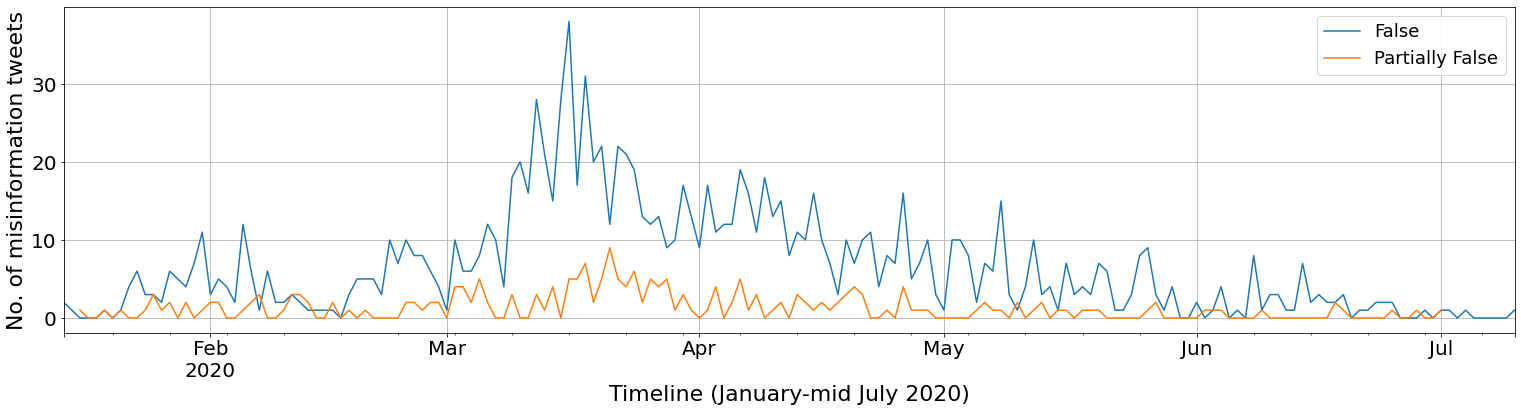

In [27]:
# histogram of the weight
plt.rcParams.update({'font.size': 20})

df_5min = df1_janjuly_tweet.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(26,6))

plt.grid(True)

# histogram of the weight
df_5min = df2_janjuly_tweet.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(26,6))
#plt.ylim(0, 40)
plt.ylabel('No. of misinformation tweets', fontsize=22)
plt.xlabel('Timeline (January-mid July 2020)', fontsize=22)
plt.legend(["False", "Partially False"], fontsize=18);
plt.grid(True)

In [28]:
df2_janjuly_tweet.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()

created_at
2020-01-16 00:00:00+00:00    1
2020-01-17 00:00:00+00:00    0
2020-01-18 00:00:00+00:00    0
2020-01-19 00:00:00+00:00    1
2020-01-20 00:00:00+00:00    0
                            ..
2020-06-27 00:00:00+00:00    0
2020-06-28 00:00:00+00:00    1
2020-06-29 00:00:00+00:00    0
2020-06-30 00:00:00+00:00    0
2020-07-01 00:00:00+00:00    1
Freq: D, Length: 168, dtype: int64

In [66]:
plt.rcParams["svg.fonttype"] = "none"

In [67]:
plt.savefig("test.svg", format="svg")

<Figure size 432x288 with 0 Axes>

In [68]:
#import numpy as np
#x = np.arange(0,100,0.00001)
#y = x*np.sin(2*np.pi*x)
#plt.plot(y)
plt.savefig("test.svg", format="svg")

<Figure size 432x288 with 0 Axes>

In [28]:
'''
# histogram of the weight
df_5min = df1_jan.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
#plt.ylabel('5 Minute ID Count')
#plt.title('Timeline of Tweet')
plt.grid(True)

# histogram of the weight
df_5min = df2_jan.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
plt.ylim(0, 40)
plt.ylabel('Number of retweets in 3 hour', fontsize=16, weight='bold')
plt.xlabel('January 2020', fontsize=16, weight='bold')
plt.legend(["False", "Partially False"]);
plt.grid(True)
'''

'\n# histogram of the weight\ndf_5min = df1_jan.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\n#plt.ylabel(\'5 Minute ID Count\')\n#plt.title(\'Timeline of Tweet\')\nplt.grid(True)\n\n# histogram of the weight\ndf_5min = df2_jan.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\nplt.ylim(0, 40)\nplt.ylabel(\'Number of retweets in 3 hour\', fontsize=16, weight=\'bold\')\nplt.xlabel(\'January 2020\', fontsize=16, weight=\'bold\')\nplt.legend(["False", "Partially False"]);\nplt.grid(True)\n'

In [29]:
'''
# histogram of the weight
df_5min = df1_feb.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
#plt.ylabel('5 Minute ID Count')
#plt.title('Timeline of Tweet')
plt.grid(True)


# histogram of the weight
df_5min = df2_feb.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
plt.ylim(0, 40)
plt.ylabel('Number of retweets in 3 hour', fontsize=16, weight='bold')
plt.xlabel('February 2020', fontsize=16, weight='bold')
plt.legend(["False", "Partially False"]);
plt.grid(True)
'''

'\n# histogram of the weight\ndf_5min = df1_feb.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\n#plt.ylabel(\'5 Minute ID Count\')\n#plt.title(\'Timeline of Tweet\')\nplt.grid(True)\n\n\n# histogram of the weight\ndf_5min = df2_feb.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\nplt.ylim(0, 40)\nplt.ylabel(\'Number of retweets in 3 hour\', fontsize=16, weight=\'bold\')\nplt.xlabel(\'February 2020\', fontsize=16, weight=\'bold\')\nplt.legend(["False", "Partially False"]);\nplt.grid(True)\n'

In [30]:
'''
# histogram of the weight
df_5min = df1_march.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
#plt.ylabel('5 Minute ID Count')
#plt.title('Timeline of Tweet')
plt.grid(True)

# histogram of the weight
df_5min = df2_march.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
plt.ylim(0, 40)
plt.ylabel('Number of retweets in 3 hour', fontsize=16, weight='bold')
plt.xlabel('March 2020', fontsize=16, weight='bold')
plt.legend(["False", "Partially False"]);
#plt.title('Frequency of reweet', fontsize=15)
plt.grid(True)
'''

'\n# histogram of the weight\ndf_5min = df1_march.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\n#plt.ylabel(\'5 Minute ID Count\')\n#plt.title(\'Timeline of Tweet\')\nplt.grid(True)\n\n# histogram of the weight\ndf_5min = df2_march.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\nplt.ylim(0, 40)\nplt.ylabel(\'Number of retweets in 3 hour\', fontsize=16, weight=\'bold\')\nplt.xlabel(\'March 2020\', fontsize=16, weight=\'bold\')\nplt.legend(["False", "Partially False"]);\n#plt.title(\'Frequency of reweet\', fontsize=15)\nplt.grid(True)\n'

In [31]:
'''
# histogram of the weight
df_5min = df1_april.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
#plt.ylabel('5 Minute ID Count')
#plt.title('Timeline of Tweet')
plt.grid(True)


# histogram of the weight
df_5min = df2_april.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
plt.ylim(0, 40)
plt.ylabel('Number of retweets in 3 hour', fontsize=16, weight='bold')
plt.xlabel('April 2020', fontsize=16, weight='bold')
plt.legend(["False", "Partially False"]);
plt.grid(True)
'''

'\n# histogram of the weight\ndf_5min = df1_april.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\n#plt.ylabel(\'5 Minute ID Count\')\n#plt.title(\'Timeline of Tweet\')\nplt.grid(True)\n\n\n# histogram of the weight\ndf_5min = df2_april.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\nplt.ylim(0, 40)\nplt.ylabel(\'Number of retweets in 3 hour\', fontsize=16, weight=\'bold\')\nplt.xlabel(\'April 2020\', fontsize=16, weight=\'bold\')\nplt.legend(["False", "Partially False"]);\nplt.grid(True)\n'

In [32]:
'''
# histogram of the weight
df_5min = df1_may.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
#plt.ylabel('5 Minute ID Count')
#plt.title('Timeline of Tweet')
plt.grid(True)


# histogram of the weight
df_5min = df2_may.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
plt.ylim(0, 40)
plt.ylabel('Number of retweets in 3 hour', fontsize=16, weight='bold')
plt.xlabel('April 2020', fontsize=16, weight='bold')
plt.legend(["False", "Partially False"]);
plt.grid(True)
'''

'\n# histogram of the weight\ndf_5min = df1_may.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\n#plt.ylabel(\'5 Minute ID Count\')\n#plt.title(\'Timeline of Tweet\')\nplt.grid(True)\n\n\n# histogram of the weight\ndf_5min = df2_may.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\nplt.ylim(0, 40)\nplt.ylabel(\'Number of retweets in 3 hour\', fontsize=16, weight=\'bold\')\nplt.xlabel(\'April 2020\', fontsize=16, weight=\'bold\')\nplt.legend(["False", "Partially False"]);\nplt.grid(True)\n'

In [33]:
'''
# histogram of the weight
df_5min = df1_june.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
#plt.ylabel('5 Minute ID Count')
#plt.title('Timeline of Tweet')
plt.grid(True)


# histogram of the weight
df_5min = df2_june.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
plt.ylim(0, 40)
plt.ylabel('Number of retweets in 3 hour', fontsize=16, weight='bold')
plt.xlabel('April 2020', fontsize=16, weight='bold')
plt.legend(["False", "Partially False"]);
plt.grid(True)
'''

'\n# histogram of the weight\ndf_5min = df1_june.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\n#plt.ylabel(\'5 Minute ID Count\')\n#plt.title(\'Timeline of Tweet\')\nplt.grid(True)\n\n\n# histogram of the weight\ndf_5min = df2_june.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\nplt.ylim(0, 40)\nplt.ylabel(\'Number of retweets in 3 hour\', fontsize=16, weight=\'bold\')\nplt.xlabel(\'April 2020\', fontsize=16, weight=\'bold\')\nplt.legend(["False", "Partially False"]);\nplt.grid(True)\n'

In [34]:
'''
# histogram of the weight
df_5min = df1_july.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
#plt.ylabel('5 Minute ID Count')
#plt.title('Timeline of Tweet')
plt.grid(True)


# histogram of the weight
df_5min = df2_july.groupby(pd.Grouper(key='created_at', freq='1d', convention='start')).size()
df_5min.plot(figsize=(18,6))
plt.ylim(0, 40)
plt.ylabel('Number of retweets in 3 hour', fontsize=16, weight='bold')
plt.xlabel('April 2020', fontsize=16, weight='bold')
plt.legend(["False", "Partially False"]);
plt.grid(True)
'''

'\n# histogram of the weight\ndf_5min = df1_july.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\n#plt.ylabel(\'5 Minute ID Count\')\n#plt.title(\'Timeline of Tweet\')\nplt.grid(True)\n\n\n# histogram of the weight\ndf_5min = df2_july.groupby(pd.Grouper(key=\'created_at\', freq=\'1d\', convention=\'start\')).size()\ndf_5min.plot(figsize=(18,6))\nplt.ylim(0, 40)\nplt.ylabel(\'Number of retweets in 3 hour\', fontsize=16, weight=\'bold\')\nplt.xlabel(\'April 2020\', fontsize=16, weight=\'bold\')\nplt.legend(["False", "Partially False"]);\nplt.grid(True)\n'

In [35]:
'''# histogram of the weight
df_5min = df2_jan.groupby(pd.Grouper(key='created_at', freq='180Min', convention='start')).size()
df_5min.plot(figsize=(18,6))
plt.ylabel('5 Minute ID Count')
plt.title('Timeline of Tweet')
plt.grid(True)


# histogram of the weight
df_5min = df1_jan.groupby(pd.Grouper(key='created_at', freq='180Min', convention='start')).size()
df_5min.plot(figsize=(18,6))
plt.ylabel('5 Minute ID Count')
plt.title('Timeline of Tweet')
plt.grid(True)

# histogram of the weight
df_5min = df2_march.groupby(pd.Grouper(key='created_at', freq='180Min', convention='start')).size()
df_5min.plot(figsize=(18,6))
plt.ylabel('5 Minute ID Count')
plt.title('Timeline of Tweet')
plt.grid(True)

# histogram of the weight
df_5min = df2_april.groupby(pd.Grouper(key='created_at', freq='180Min', convention='start')).size()
df_5min.plot(figsize=(18,6))
plt.ylabel('5 Minute ID Count')
plt.title('Timeline of Tweet')
plt.grid(True)
'''

"# histogram of the weight\ndf_5min = df2_jan.groupby(pd.Grouper(key='created_at', freq='180Min', convention='start')).size()\ndf_5min.plot(figsize=(18,6))\nplt.ylabel('5 Minute ID Count')\nplt.title('Timeline of Tweet')\nplt.grid(True)\n\n\n# histogram of the weight\ndf_5min = df1_jan.groupby(pd.Grouper(key='created_at', freq='180Min', convention='start')).size()\ndf_5min.plot(figsize=(18,6))\nplt.ylabel('5 Minute ID Count')\nplt.title('Timeline of Tweet')\nplt.grid(True)\n\n# histogram of the weight\ndf_5min = df2_march.groupby(pd.Grouper(key='created_at', freq='180Min', convention='start')).size()\ndf_5min.plot(figsize=(18,6))\nplt.ylabel('5 Minute ID Count')\nplt.title('Timeline of Tweet')\nplt.grid(True)\n\n# histogram of the weight\ndf_5min = df2_april.groupby(pd.Grouper(key='created_at', freq='180Min', convention='start')).size()\ndf_5min.plot(figsize=(18,6))\nplt.ylabel('5 Minute ID Count')\nplt.title('Timeline of Tweet')\nplt.grid(True)\n"

In [36]:
df['created_at']=pd.to_datetime(df['created_at'])
df['cutoff_date']=pd.to_datetime('2019-12-31 23:59:59+00:00')
df1['created_at']=pd.to_datetime(df1['created_at'])
df1['cutoff_date']=pd.to_datetime('2019-12-31 23:59:59+00:00')
df2['created_at']=pd.to_datetime(df2['created_at'])
df2['cutoff_date']=pd.to_datetime('2019-12-31 23:59:59+00:00')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [37]:
df['account_age']=(df['created_at']-df['cutoff_date']).dt.days
df1['account_age']=(df1['created_at']-df1['cutoff_date']).dt.days
df2['account_age']=(df2['created_at']-df2['cutoff_date']).dt.days

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
df['account_age'].median(skipna = True)

82.0

In [39]:
df1['account_age'].median(skipna = True)

82.0

In [40]:
df2['account_age'].median(skipna = True)

80.0

In [41]:
df['hashtag']=df.text.str.findall(r'#.*?(?=\s|$)')
df1['hashtag']=df1.text.str.findall(r'#.*?(?=\s|$)')
df2['hashtag']=df2.text.str.findall(r'#.*?(?=\s|$)')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
df['hashtag']=df['hashtag'].astype(str).str.replace('\[|\]|\'', '')
df1['hashtag']=df1['hashtag'].astype(str).str.replace('\[|\]|\'', '')
df2['hashtag']=df2['hashtag'].astype(str).str.replace('\[|\]|\'', '')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
(df['hashtag'].values == '').sum() 
#919/147(1066)

1066

In [44]:
(df1['hashtag'].values == '').sum() 

919

In [45]:
(df2['hashtag'].values == '').sum() 

147

In [46]:
df['mention']=df.text.str.findall(r'@[A-Za-z0-9]+')
df['mention']=df['mention'].astype(str).str.replace('\[|\]|\'', '')
(df['mention'].values == '').sum() 
#1019/176/(1195)

1195

In [47]:
df1['mention']=df1.text.str.findall(r'@[A-Za-z0-9]+')
df1['mention']=df1['mention'].astype(str).str.replace('\[|\]|\'', '')
(df1['mention'].values == '').sum() 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1019

In [48]:
df2['mention']=df2.text.str.findall(r'@[A-Za-z0-9]+')
df2['mention']=df2['mention'].astype(str).str.replace('\[|\]|\'', '')
(df2['mention'].values == '').sum() 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


176

In [176]:
df_1=df.drop_duplicates(subset=['screen_name'])
df_12=df1.drop_duplicates(subset=['screen_name'])
df_13=df2.drop_duplicates(subset=['screen_name'])

In [178]:
df_13.shape

(198, 103)

In [179]:
df_1['user_status'].value_counts()
#162/973(1138)

Brand     792
Male      241
Female     56
           28
Name: user_status, dtype: int64

In [180]:
df_12['user_status'].value_counts()

Brand     698
Male      195
Female     47
           24
Name: user_status, dtype: int64

In [181]:
df_13['user_status'].value_counts()

Brand     135
Male       49
Female      9
            5
Name: user_status, dtype: int64

In [52]:
(df['bot_score'].values >= 65).sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


24

In [53]:
(df1['bot_score'].values >= 65).sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


22

In [54]:
(df2['bot_score'].values >= 65).sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


2

In [169]:
df['emoji']=df['text'].apply(lambda x: bool(emoji.get_emoji_regexp().search(x)))
df['emoji'].value_counts()

False    1312
True      188
Name: emoji, dtype: int64

In [167]:
df1['emoji']=df1['text'].apply(lambda x: bool(emoji.get_emoji_regexp().search(x)))
df1['emoji'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    1106
True      168
Name: emoji, dtype: int64

In [170]:
df2['emoji']=df2['text'].apply(lambda x: bool(emoji.get_emoji_regexp().search(x)))
df2['emoji'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


False    206
True      20
Name: emoji, dtype: int64

In [55]:
#df1['created_at']=pd.to_datetime(df1['created_at'])
df1_jan = df1[(df1['created_at'] >= '2020-01-01 00:00:00+00:00') & (df1['created_at'] <= '2020-01-31 23:59:59+00:00')]
df1_feb = df1[(df1['created_at'] >= '2020-02-01 00:00:00+00:00') & (df1['created_at'] <= '2020-02-29 23:59:59+00:00')]
df1_march = df1[(df1['created_at'] >= '2020-03-01 00:00:00+00:00') & (df1['created_at'] <= '2020-03-31 23:59:59+00:00')]
df1_april = df1[(df1['created_at'] >= '2020-04-01 00:00:00+00:00') & (df1['created_at'] <= '2020-04-27 23:59:59+00:00')]
df1_may = df1[(df1['created_at'] >= '2020-05-01 00:00:00+00:00') & (df1['created_at'] <= '2020-05-31 23:59:59+00:00')]
df1_june = df1[(df1['created_at'] >= '2020-06-01 00:00:00+00:00') & (df1['created_at'] <= '2020-06-30 23:59:59+00:00')]
df1_july = df1[(df1['created_at'] >= '2020-07-01 00:00:00+00:00') & (df1['created_at'] <= '2020-07-10 23:59:59+00:00')]

df1_janjuly = df1[(df1['created_at'] >= '2020-01-01 00:00:00+00:00') & (df1['created_at'] <= '2020-07-10 23:59:59+00:00')]

In [56]:
#df1['created_at']=pd.to_datetime(df1['created_at'])
df2_jan = df2[(df2['created_at'] > '2020-01-01 00:00:00+00:00') & (df2['created_at'] <= '2020-01-31 23:59:59+00:00')]
df2_feb = df2[(df2['created_at'] > '2020-02-01 00:00:00+00:00') & (df2['created_at'] <= '2020-02-29 23:59:59+00:00')]
df2_march = df2[(df2['created_at'] > '2020-03-01 00:00:00+00:00') & (df2['created_at'] <= '2020-03-31 23:59:59+00:00')]
df2_april = df2[(df2['created_at'] > '2020-04-01 00:00:00+00:00') & (df2['created_at'] <= '2020-04-27 23:59:59+00:00')]
df2_may = df2[(df2['created_at'] >= '2020-05-01 00:00:00+00:00') & (df2['created_at'] <= '2020-05-31 23:59:59+00:00')]
df2_june = df2[(df2['created_at'] >= '2020-06-01 00:00:00+00:00') & (df2['created_at'] <= '2020-06-30 23:59:59+00:00')]
df2_july = df2[(df2['created_at'] >= '2020-07-01 00:00:00+00:00') & (df2['created_at'] <= '2020-07-10 23:59:59+00:00')]

df2_janjuly = df2[(df2['created_at'] >= '2020-01-01 00:00:00+00:00') & (df2['created_at'] <= '2020-07-30 23:59:59+00:00')]

In [57]:
df1_jan=df1_jan.set_index('created_at')
df1_feb=df1_feb.set_index('created_at')
df1_march=df1_march.set_index('created_at')
df1_april=df1_april.set_index('created_at')
df1_may=df1_may.set_index('created_at')
df1_june=df1_june.set_index('created_at')
df1_july=df1_july.set_index('created_at')
df2_jan=df2_jan.set_index('created_at')
df2_feb=df2_feb.set_index('created_at')
df2_march=df2_march.set_index('created_at')
df2_april=df2_april.set_index('created_at')
df2_may=df2_may.set_index('created_at')
df2_june=df2_june.set_index('created_at')
df2_july=df2_july.set_index('created_at')

In [58]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

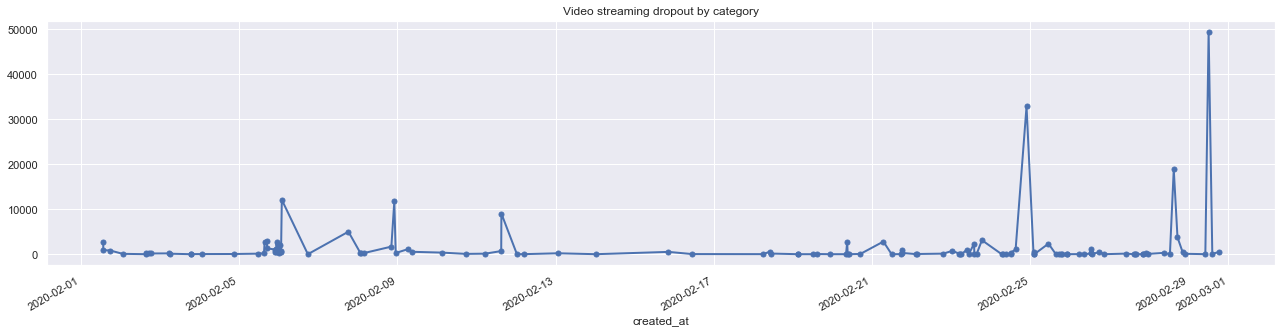

In [59]:
ax = df1_feb['retweet_count'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))

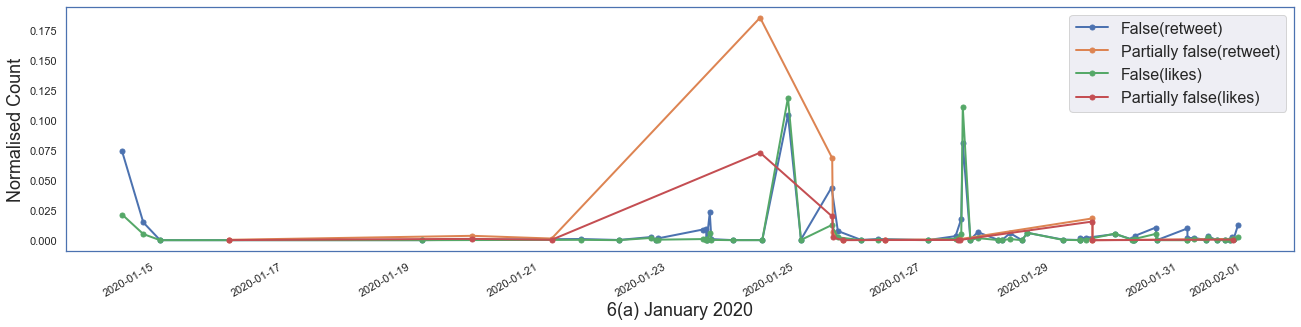

In [113]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#plt.rcParams.update({'font.size': 30})
ax = df1_jan['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_jan['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df1_jan['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_jan['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax.set_xlabel("6(a) January 2020",fontsize=18)
ax.set_ylabel("Normalised Count",fontsize=18)
#ax.grid(linestyle='-', linewidth='0.0', color='red')
#plt.ylim(0, 1)
plt.rc('axes',edgecolor='b')
ax.set_facecolor('xkcd:white')
ax.legend(["False(retweet)", "Partially false(retweet)", 'False(likes)','Partially false(likes)'],fontsize=16)
plt.savefig('jan.png')

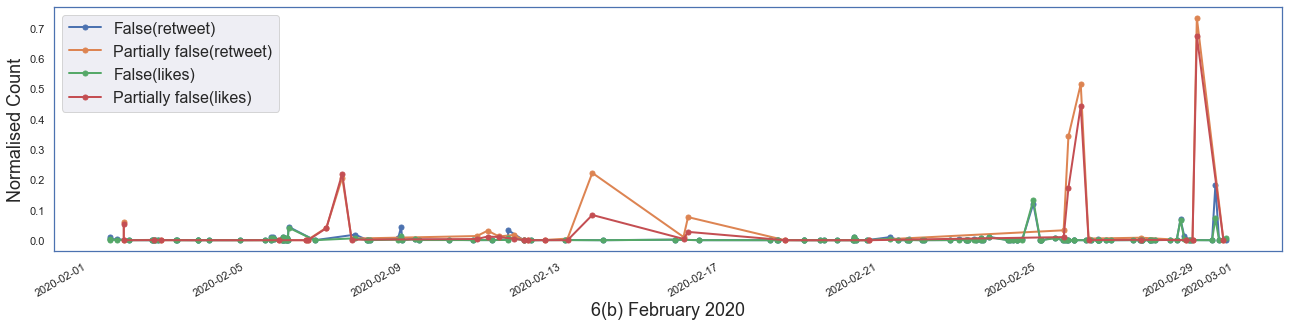

In [114]:
plt.rcParams.update({'font.size': 30})
ax = df1_feb['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_feb['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df1_feb['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_feb['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax.set_xlabel("6(b) February 2020",fontsize=18)
ax.set_ylabel("Normalised Count",fontsize=18)
#plt.ylim(0, 1)
plt.rc('axes',edgecolor='b')
ax.set_facecolor('xkcd:white')
ax.legend(["False(retweet)", "Partially false(retweet)", 'False(likes)','Partially false(likes)'],fontsize=16)
plt.savefig('feb.png')

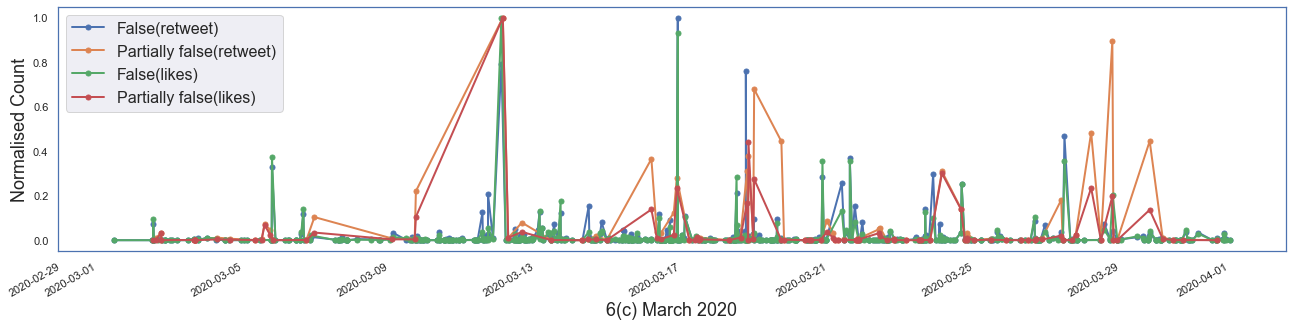

In [115]:
plt.rcParams.update({'font.size': 30})
ax = df1_march['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_march['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df1_march['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_march['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax.set_xlabel("6(c) March 2020",fontsize=18)
ax.set_ylabel("Normalised Count",fontsize=18)
#plt.ylim(0, 1)
plt.rc('axes',edgecolor='b')
ax.set_facecolor('xkcd:white')
ax.legend(["False(retweet)", "Partially false(retweet)", 'False(likes)','Partially false(likes)'],fontsize=16);
plt.savefig('mar.png')

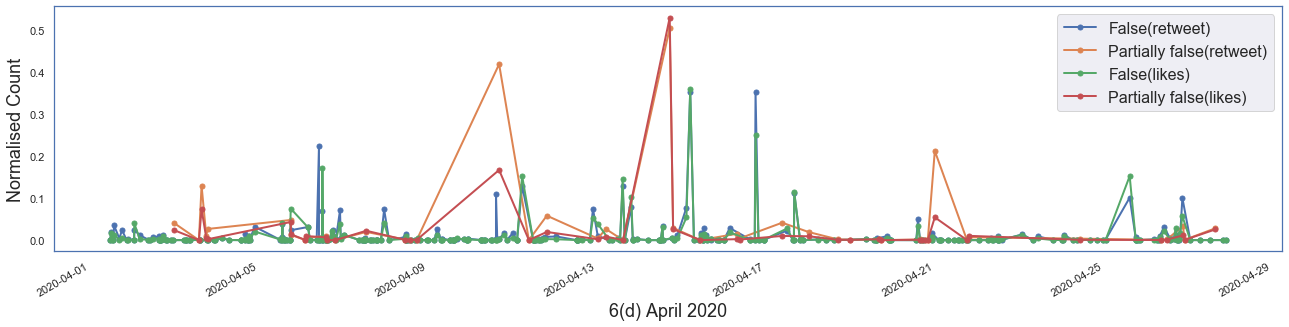

In [116]:
plt.rcParams.update({'font.size': 30})
ax = df1_april['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_april['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df1_april['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_april['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax.set_xlabel("6(d) April 2020",fontsize=18)
ax.set_ylabel("Normalised Count",fontsize=18)
#plt.ylim(0, 1)
plt.rc('axes',edgecolor='b')
ax.set_facecolor('xkcd:white')
ax.legend(["False(retweet)", "Partially false(retweet)", 'False(likes)','Partially false(likes)'],fontsize=16);
plt.savefig('apr.png')

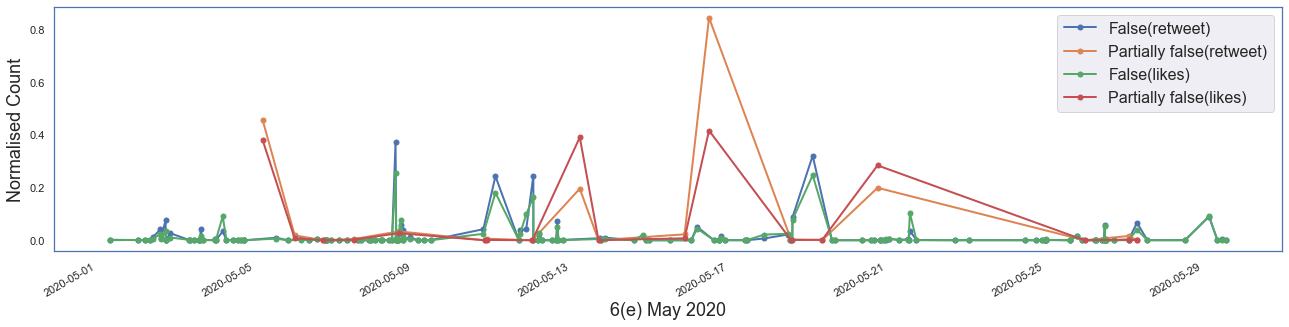

In [117]:
plt.rcParams.update({'font.size': 30})
ax = df1_may['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_may['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df1_may['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_may['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax.set_xlabel("6(e) May 2020",fontsize=18)
ax.set_ylabel("Normalised Count",fontsize=18)
#plt.ylim(0, 1)
plt.rc('axes',edgecolor='b')
ax.set_facecolor('xkcd:white')
ax.legend(["False(retweet)", "Partially false(retweet)", 'False(likes)','Partially false(likes)'],fontsize=16);
plt.savefig('may.png')

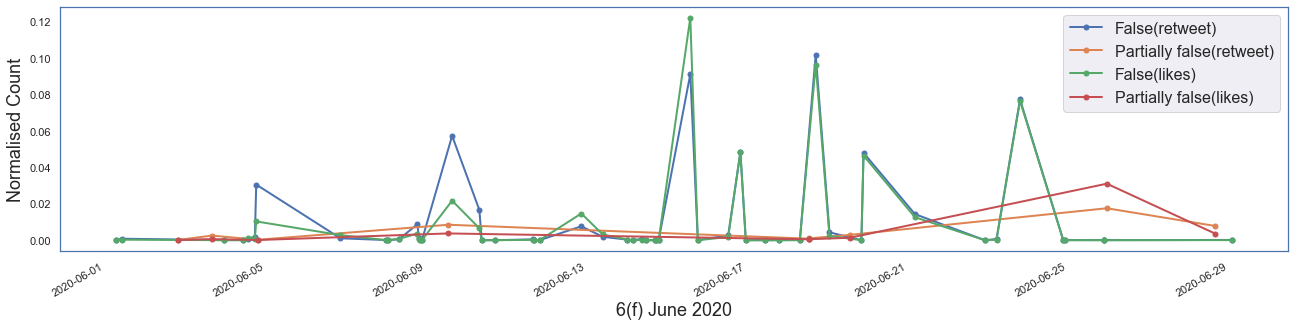

In [118]:
plt.rcParams.update({'font.size': 30})
ax = df1_june['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_june['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df1_june['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_june['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax.set_xlabel("6(f) June 2020",fontsize=18)
ax.set_ylabel("Normalised Count",fontsize=18)
#plt.ylim(0, 1)
plt.rc('axes',edgecolor='b')
ax.set_facecolor('xkcd:white')
ax.legend(["False(retweet)", "Partially false(retweet)", 'False(likes)','Partially false(likes)'],fontsize=16);
plt.savefig('jun.png')

In [124]:
df1_july['retweet_count']

created_at
2020-07-10 12:03:22+00:00    321
2020-07-02 16:00:42+00:00    200
2020-07-04 22:08:37+00:00     54
2020-07-01 18:50:11+00:00    699
Name: retweet_count, dtype: int64

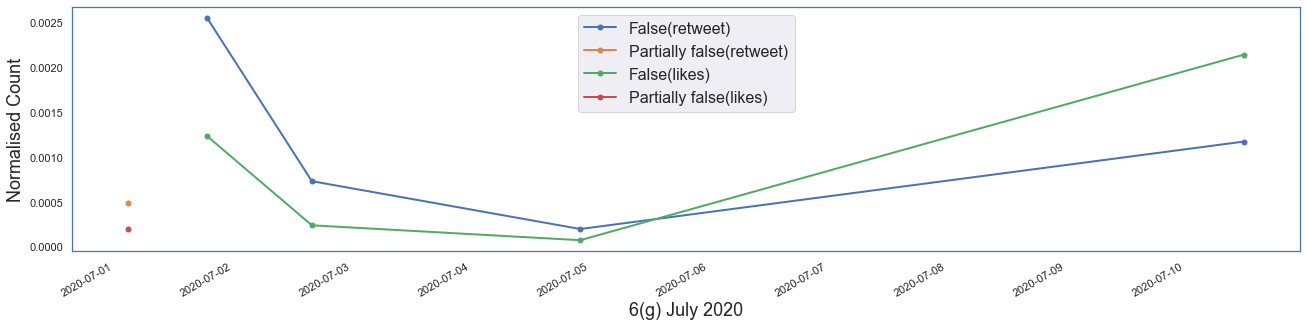

In [119]:
plt.rcParams.update({'font.size': 30})
ax = df1_july['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_july['normalise_retweet'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df1_july['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax = df2_july['normalise_favorite'].plot(lw=2, marker='.', markersize=10,figsize=(22,5))
ax.set_xlabel("6(g) July 2020",fontsize=18)
ax.set_ylabel("Normalised Count",fontsize=18)
#plt.ylim(0, 1)
plt.rc('axes',edgecolor='b')
ax.set_facecolor('xkcd:white')
ax.legend(["False(retweet)", "Partially false(retweet)", 'False(likes)','Partially false(likes)'],fontsize=16);
plt.savefig('jul.png')

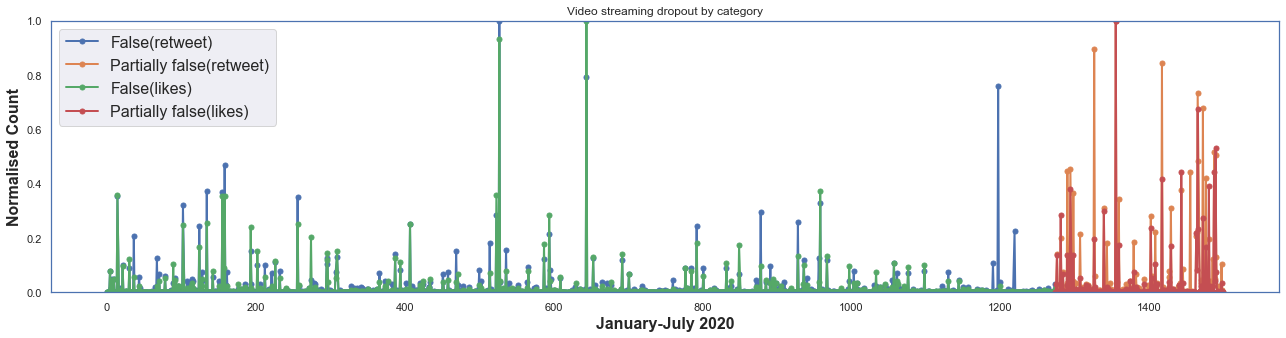

In [102]:
plt.rcParams.update({'font.size': 30})
ax = df1_janjuly['normalise_retweet'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df2_janjuly['normalise_retweet'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df1_janjuly['normalise_favorite'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df2_janjuly['normalise_favorite'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax.set_xlabel("January-July 2020",fontsize=16, weight='bold')
ax.set_ylabel("Normalised Count",fontsize=16, weight='bold')
plt.ylim(0, 1)
plt.rc('axes',edgecolor='b')
ax.set_facecolor('xkcd:white')
ax.legend(["False(retweet)", "Partially false(retweet)", 'False(likes)','Partially false(likes)'],fontsize=16);

In [103]:
'''plt.rcParams.update({'font.size': 30})
ax = df1_jan['standardised_retweet'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df2_jan['standardised_retweet'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df1_jan['standardised_favorite'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df2_jan['standardised_favorite'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax.set_xlabel("January 2020",fontsize=16, weight='bold')
ax.set_ylabel("Normalised Count",fontsize=16, weight='bold')
plt.ylim(0, 0.3)
ax.legend(["False(retweet)", "Partially false(retweet)", 'False(likes)','Partially false(likes)'],fontsize=16);
'''

'plt.rcParams.update({\'font.size\': 30})\nax = df1_jan[\'standardised_retweet\'].plot(lw=2, marker=\'.\', markersize=10, title=\'Video streaming dropout by category\',figsize=(22,5))\nax = df2_jan[\'standardised_retweet\'].plot(lw=2, marker=\'.\', markersize=10, title=\'Video streaming dropout by category\',figsize=(22,5))\nax = df1_jan[\'standardised_favorite\'].plot(lw=2, marker=\'.\', markersize=10, title=\'Video streaming dropout by category\',figsize=(22,5))\nax = df2_jan[\'standardised_favorite\'].plot(lw=2, marker=\'.\', markersize=10, title=\'Video streaming dropout by category\',figsize=(22,5))\nax.set_xlabel("January 2020",fontsize=16, weight=\'bold\')\nax.set_ylabel("Normalised Count",fontsize=16, weight=\'bold\')\nplt.ylim(0, 0.3)\nax.legend(["False(retweet)", "Partially false(retweet)", \'False(likes)\',\'Partially false(likes)\'],fontsize=16);\n'

In [104]:
'''plt.rcParams.update({'font.size': 30})
ax = df1_feb['standardised_retweet'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df2_feb['standardised_retweet'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df1_feb['standardised_favorite'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df2_feb['standardised_favorite'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax.set_xlabel("January 2020",fontsize=16, weight='bold')
ax.set_ylabel("Normalised Count",fontsize=16, weight='bold')
plt.ylim(0, 0.3)
ax.legend(["False(retweet)", "Partially false(retweet)", 'False(likes)','Partially false(likes)'],fontsize=16);'''

'plt.rcParams.update({\'font.size\': 30})\nax = df1_feb[\'standardised_retweet\'].plot(lw=2, marker=\'.\', markersize=10, title=\'Video streaming dropout by category\',figsize=(22,5))\nax = df2_feb[\'standardised_retweet\'].plot(lw=2, marker=\'.\', markersize=10, title=\'Video streaming dropout by category\',figsize=(22,5))\nax = df1_feb[\'standardised_favorite\'].plot(lw=2, marker=\'.\', markersize=10, title=\'Video streaming dropout by category\',figsize=(22,5))\nax = df2_feb[\'standardised_favorite\'].plot(lw=2, marker=\'.\', markersize=10, title=\'Video streaming dropout by category\',figsize=(22,5))\nax.set_xlabel("January 2020",fontsize=16, weight=\'bold\')\nax.set_ylabel("Normalised Count",fontsize=16, weight=\'bold\')\nplt.ylim(0, 0.3)\nax.legend(["False(retweet)", "Partially false(retweet)", \'False(likes)\',\'Partially false(likes)\'],fontsize=16);'

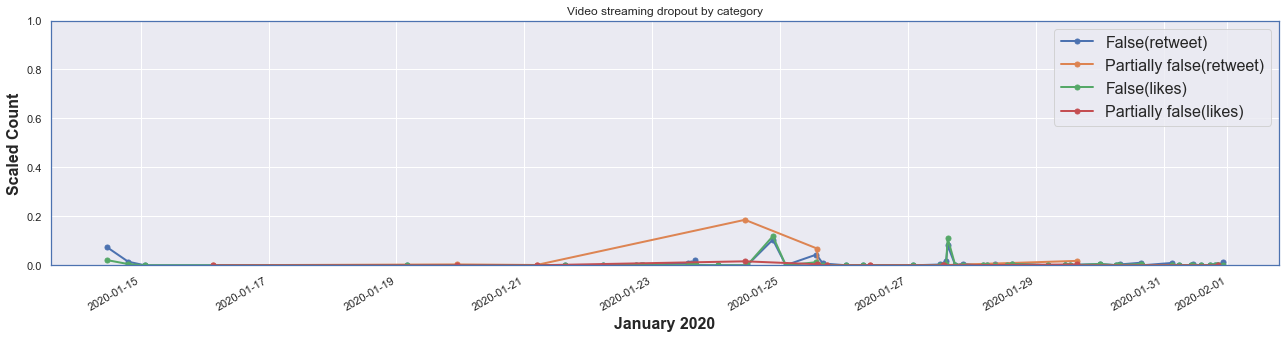

In [105]:
plt.rcParams.update({'font.size': 30})
ax = df1_jan['scaled_retweet'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df2_jan['scaled_retweet'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df1_jan['scaled_favorite'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax = df2_jan['scaled_favorite'].plot(lw=2, marker='.', markersize=10, title='Video streaming dropout by category',figsize=(22,5))
ax.set_xlabel("January 2020",fontsize=16, weight='bold')
ax.set_ylabel("Scaled Count",fontsize=16, weight='bold')
plt.ylim(0, 1)
ax.legend(["False(retweet)", "Partially false(retweet)", 'False(likes)','Partially false(likes)'],fontsize=16);

In [120]:
import cv2 
 
i1 = cv2.imread('jan.png') 
i2 = cv2.imread('feb.png')
i3 = cv2.imread('mar.png') 
i4 = cv2.imread('apr.png')
i5 = cv2.imread('may.png') 
i6 = cv2.imread('jun.png')
i7 = cv2.imread('jul.png') 

In [123]:
import numpy as  np
im_v = cv2.vconcat([i1,i2,i3,i4,i5,i6,i7])
file='D:\Gautam\FakeNews\retweet_timeline.png'
#im_v.save('retweet_timeline.jpg')  
im_v= np.concatenate((i1,i2,i3,i4,i5,i6,i7), axis=0)
# show the output image 
#cv2.imwrite(file, im_v)
#cv2.imshow('D:\Gautam\FakeNews\retweet_timeline.png',im_v)
cv2.imwrite('retweet_timeline.png', im_v)

True

In [122]:
cv2.imshow('out.png',im_v)